<a href="https://colab.research.google.com/github/DarshGupta1910/Iquest_ML_Task/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualization of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("pima-indians-diabetes.csv")
df.head(5)


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


### Applying the pair plot to choose the right algorithm

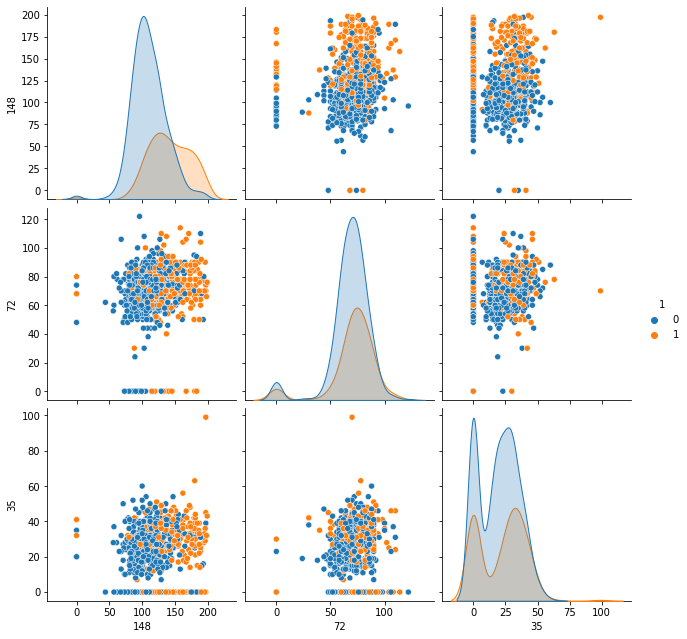

In [5]:
sb.pairplot(data=df[['148' ,'72','35', '1']], hue='1', dropna=True, height=3)

From the plot, we can see that there is a lot of overlap between the data points.KNN should be preferred as it works on the principle of Euclidean distance. In case KNN is not performing as per the expectation then we can use the Decision Tree or Random Forest algorithm.

A decision tree or Random Forest works on the principle of non-linear classification. We can use it if some of the data points are overlapping with each other.

Many algorithms work on the assumption that classes can be separated by a straight line. In such cases, Logistic regression or Support Vector Machine should be preferred. It easily separates the data points by drawing a line that divides the target class. Linear regression algorithms assume that data trends follow a straight line. These algorithms perform well for the present case.

In [7]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#Store independent and dependent variable
feature = ['6', '148', '72', '35','0','33.6','0.627','50']
X = df[feature] # Features
y = df["1"]

Split the data into train and test.Now, we will fit several machine learning models on this dataset and check the training time taken by these models.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Decision Tree

In [10]:
import time
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
start = time.time()
clf = clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")


Training time: 0.007412910461425781s


#### Logistic Regression

In [11]:
#Import sklearn library
from sklearn.linear_model import LogisticRegression
import time
clf = LogisticRegression(random_state = 0) 
start = time.time()
clf.fit(X_train,y_train) 
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.03449249267578125s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
start = time.time()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.18919658660888672s


#### Support Vector Machine

In [13]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
start = time.time() 
# fitting x samples and y classes 
clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 2.866464614868164s


From the above results, we can conclude that Decision Trees will take much less time than all algorithms for small dataset. Hence, it is recommended to use a low bias/high variance classifier like a decision tree.